In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def load_pdf_numeric(pdf_path, name=None):
    with open(pdf_path) as f:
        energy_binning = np.loadtxt(f, max_rows=1)
        cosAngle_binning = np.loadtxt(f, max_rows=1)
        pdf = np.loadtxt(f)
    # return energy_binning, cosAngle_binning, pdf
    return name, energy_binning, cosAngle_binning, pdf

es_pdf_path = '/media/linux_store/hep/data/pdf/ES_gvkm_radiological_0201_pdf.dat'
cc_pdf_path = '/media/linux_store/hep/data/pdf/CC_gvkm_radiological_0201_pdf.dat'
name, energy_binning, cosAngle_binning, pdf_data = load_pdf_numeric(es_pdf_path)

/tmp/ipykernel_9675/1561392827.py:3: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  energy_binning = np.loadtxt(f, max_rows=1)
/tmp/ipykernel_9675/1561392827.py:4: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarning

/tmp/ipykernel_65719/2650882961.py:3: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  energy_binning = np.loadtxt(f, max_rows=1)
/tmp/ipykernel_65719/2650882961.py:4: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarni

0.4118621506223297
(24, 100)


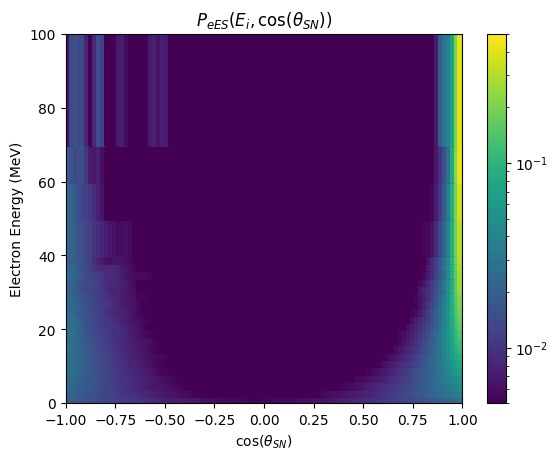

In [4]:
es_pdf_path = '/media/linux_store/hep/data/pdf/ES_gvkm_radiological_0201_pdf.dat'
name, energy_binning, cosAngle_binning, pdf_data = load_pdf_numeric(es_pdf_path)

x_binedge = [0, *energy_binning, 100] # add overflow bin boundaries
y_binedge = [*np.arange(*cosAngle_binning), 1]
# print(y_binedge.shape)
print(np.max(pdf_data))

print(pdf_data.shape)
fig = plt.figure()
pcol = plt.pcolormesh(y_binedge, x_binedge, pdf_data, norm=mpl.colors.LogNorm(vmin=5e-3, vmax=0.5))
pcol.set_edgecolor('face')
plt.xlabel("$\cos(\\theta_{SN})$")
plt.ylabel("Electron Energy (MeV)")
plt.title(r"$P_{eES}(E_i, \cos(\theta_{SN}))$")
plt.colorbar()
plt.show()
fig.savefig('../../dune_pointing_paper/plots/ES_pdf/ES_pdf_2d.pdf', format='pdf')

/tmp/ipykernel_12395/2650882961.py:3: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  energy_binning = np.loadtxt(f, max_rows=1)
/tmp/ipykernel_12395/2650882961.py:4: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarni

0.012157624496000502
(24, 100)


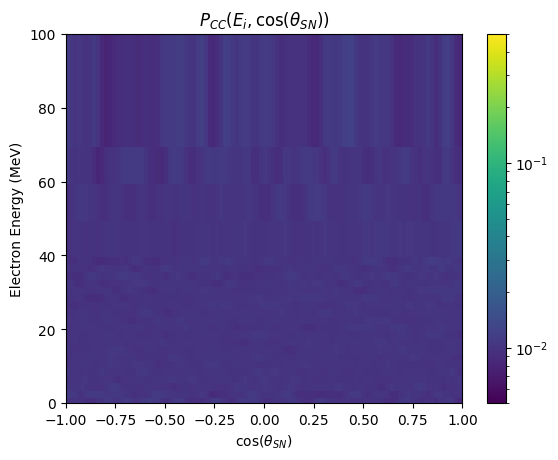

In [22]:
es_pdf_path = '/media/linux_store/hep/data/pdf/CC_gvkm_radiological_0201_pdf.dat'
name, energy_binning, cosAngle_binning, pdf_data = load_pdf_numeric(es_pdf_path)

x_binedge = [0, *energy_binning, 100] # add overflow bin boundaries
y_binedge = [*np.arange(*cosAngle_binning), 1]
print(np.max(pdf_data))
print(pdf_data.shape)
fig = plt.figure()
pcol=plt.pcolormesh(y_binedge, x_binedge, pdf_data, norm=mpl.colors.LogNorm(vmin=5e-3, vmax=0.5))
pcol.set_edgecolor('face')
plt.xlabel("$\cos(\\theta_{SN})$")
plt.ylabel("Electron Energy (MeV)")
plt.title(r"$P_{CC}(E_i, \cos(\theta_{SN}))$")
plt.colorbar()
plt.show()
fig.savefig('../../dune_pointing_paper/plots/CC_pdf/CC_pdf_2d.pdf', format='pdf')

In [ ]:
name, energy_binning, cosAngle_binning, pdf_data = load_pdf_numeric(es_pdf_path)


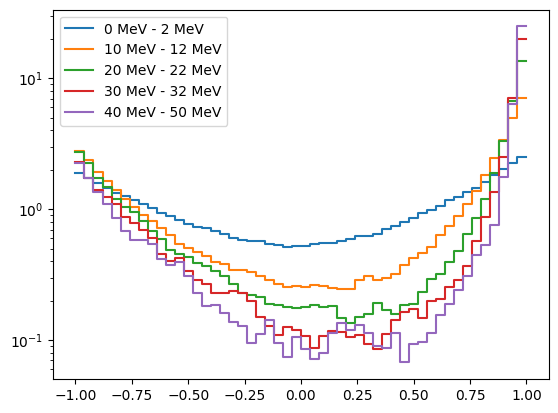

In [31]:
def plot_steps(xs, ys):
    """ Plot step-style histogram given bin edges and bin values"""
    assert len(xs) == len(ys) + 1
    plt_x = []
    plt_y = []
    for i, y in enumerate(ys):
        plt_y.append(y)
        plt_x.append(xs[i])
        plt_y.append(y)
        plt_x.append(xs[i+1])
    plt_x = np.asarray(plt_x)
    plt_y = np.asarray(plt_y)
    return plt_x, plt_y

def rebin(x, y, N):
    x = np.asarray(x)
    y = np.asarray(y)
    return x[::N], np.average(y.reshape((-1, N)), axis=1)

x_binedge = [0, *energy_binning, 100] # add overflow bin boundaries
y_binedge = [*np.arange(*cosAngle_binning), 1]

# print(y_binedge.shape)
for i in range(0, len(pdf_data), 5):
    p = pdf_data[i]
    rebinned = rebin(y_binedge, p, 2)
    plt_steps = plot_steps(*rebinned)
    plt.plot(plt_steps[0], plt_steps[1] * len(p), label=f"{x_binedge[i]:.0f} MeV - {x_binedge[i+1]:.0f} MeV")
plt.semilogy()
plt.legend()

In [2]:
import pickle

pickle_path = "/media/linux_store/hep/data/pickles/event_pools.pkl"
with open(pickle_path, "rb") as f:
    [ES_event_pool, CC_event_pool] = pickle.load(f)
    
e_es, ldir_es, ndir_es = ES_event_pool
e_cc, ldir_cc, ndir_cc = CC_event_pool


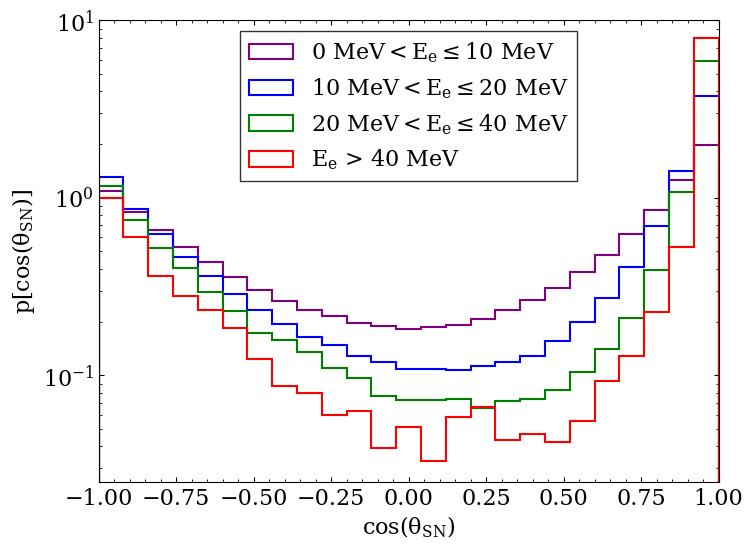

In [9]:
plt.style.use('/media/linux_store/hep/plot_style.mplstyle')

cosTheta_es = np.einsum('ij, ij->i', ldir_es, ndir_es)

ebins = [0, 10, 20, 40, np.inf]
colors = ['purple', 'blue', 'green', 'red']
for binLeft, binRight, c in zip(ebins[:-1], ebins[1:], colors):
    mask = np.logical_and(e_es > binLeft, e_es <= binRight)
    leg = f"{binLeft} MeV$< E_e \leq ${binRight} MeV" if binRight != np.inf else f"$E_e$ > {binLeft} MeV "
    plt.hist(cosTheta_es[mask],
            bins=25,
            histtype='step',
            density=True,
            color=c,
            label=leg,
            linewidth=1.5,
#             log=True
            )
plt.ylim(0.025, 10)
plt.xlim(-1, 1)
leg = plt.legend(loc='upper center', fancybox=False)
leg.get_frame().set_edgecolor('k')

plt.xlabel(r'$\cos(\theta_{SN})$')
plt.ylabel(r'$p\left[\cos(\theta_{SN})\right]$')
plt.semilogy()
plt.savefig('/media/linux_store/hep/dune_pointing_paper/plots/ES_pdf/COMB.pdf')
plt.show()

In [51]:
np.logical_and(e_es > 10, e_es <= 20)

array([ True,  True, False, ..., False, False, False])